##**Modelado para pronosticar mediante series de tiempo la estimación de la demanda internacional del Arándano Orgánico de Perú:**


En este Análisis existen varios algoritmos de Machine Learning nuestros objetivo principal es predecir la variable cantidad de toneladas de Arándanos orgánicos del Perú que se van exportar al exterior, como la Regresión Lineal, Regresión Múltiple, Árboles de Decisión, Redes Neuronales entre otros.
Sin embargo, utilizaremos la Regresión Lineal, ya que es un modelo de análisis estadístico que permitirá estimar el efecto de la variable independiente (Precio de exportación) sobre la variable dependiente (Demanda de Arándanos-cantidad expresada en toneladas).

Para lograr este objetivo, realizaremos la extracción de características, el preprocesamiento y la selección del modelo. Experimentaremos con varios modelos de regresión, incluidos la regresión lineal,("...."), para identificar el modelo más adecuado para predecir las calificaciones de la Importación . Evaluaremos el desempeño de estos modelos utilizando el puntaje (...), que mide la proporción de la varianza en la variable dependiente que es predecible a partir de las variables independientes.

Con este enfoque se busca establecer una relación matemática entre las variables predictorias y la variable de respuesta, para luego usar la ecuación resultante y predecir la demanda futura

**Descripción de datos**

El data frame de Las Exportaciones de Arandanos Peruanos tiene 84886 filas y 33 columnas.

Este data frame contiene las siguientes columnas:

Aduana

Fecha

Exportador

Kg Neto

Toneladas

U$ FOB Tot

U$ FOB Und 1

Pais de Destino

Puerto de Destino

Via


**Objetivo de este Notebook**
1. Como construir e interpretar un modelo de regresión linear multivariada.
2. Descargar y limpiar un Dataset
3. Realizar los pasos necesarios previos a la etapa de modelamiento
4. Entrenar y Testear modelo


**Primero, importemos Librerias que necesitaremos para el análisis y construcción del modelo.**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import datetime as dt
import seaborn as sns

##1. DATA COLLECTION

In [ ]:
#Importamos el archivo de excel a un dataframe de pandas
#Aqui podemos observar las 5 primeras observaciones de nuestro dataframe 

dfar = pd.read_excel('/content/DB arandanos.xlsx')
dfar.head()

,Partida Aduanera,Descripcion de la Partida Aduanera,Aduana,DUA,Fecha,AÑO,MES,FECHA_CONCAT,Cod. Tributario,Exportador,...,Agente Portuario,Agente de Aduana,Descripcion Comercial,Descripcion1,Descripcion2,Descripcion3,Descripcion4,Naviera,PBI USA,IBP
0,810400000,ARANDANOS O MURTONES Y DEMAS FRUTOS DEL GENERO...,AEREA DEL CALLAO,094694 | 1,2017-10-18,2017,OCTUBRE,2017_OCTUBRE,20519190681,AGROINVERSIONES VALLE Y PAMPA PERU SOCIEDAD AN...,...,LAN PERU S.A.,L.B. GAYOSO S.A.C.,ARANDANOS FRESCOS CODIGO Nº13 RESTITUCION D...,ARANDANOS FRESCOS,NaN,NaN,NaN,NaN,1437296.0,11248.220553
1,810400000,ARANDANOS O MURTONES Y DEMAS FRUTOS DEL GENERO...,AEREA DEL CALLAO,104337 | 1,2017-10-18,2017,OCTUBRE,2017_OCTUBRE,20378668574,PHOENIX FOODS S.A.C.,...,IBERIA,LIP ADUANAS S.A.,ARANDANOS FRESCOS EN CAJAS DRAWBACK,ARANDANOS FRESCOS,NaN,NaN,EN CAJAS,NaN,1437296.0,11248.220553
2,810400000,ARANDANOS O MURTONES Y DEMAS FRUTOS DEL GENERO...,SALAVERRY,004957 | 1,2017-10-18,2017,OCTUBRE,2017_OCTUBRE,20461642706,AGRICOLA CERRO PRIETO S.A.,...,UNIMAR S.A.,SCHARFF LOGISTICA INTEGRADA S.A.,ARANDANOS FRESCOS EN CAJAS COLD TREATMENT CONS...,ARANDANOS FRESCOS,EN CAJAS,COLD TREATMENT,CONSUMO HUMANO,NaN,1437296.0,11248.220553
3,810400000,ARANDANOS O MURTONES Y DEMAS FRUTOS DEL GENERO...,MARITIMA DEL CALLAO,095458 | 1,2017-10-18,2017,OCTUBRE,2017_OCTUBRE,20536911708,VISON´S S.A.C.,...,MEDITERRANEAN SHIPPING CO.PERU S.A.C.,DESPACHOS ADUANEROS CHAVIMOCHIC SAC,ARANDANOS FRESCOS EN CAJAS SE ACOGE A DRAWBACK,ARANDANOS FRESCOS,EN CAJAS,NaN,NaN,MEDITERRANEAN SHIPPING COMPANY,1437296.0,11248.220553
4,810400000,ARANDANOS O MURTONES Y DEMAS FRUTOS DEL GENERO...,SALAVERRY,004937 | 2,2017-10-18,2017,OCTUBRE,2017_OCTUBRE,20461642706,AGRICOLA CERRO PRIETO S.A.,...,UNIMAR S.A.,SCHARFF LOGISTICA INTEGRADA S.A.,ARANDANO CONVENCIONAL FRESCO EN CAJAS PARA CO...,ARANDANO CONVENCIONAL FRESCO,EN CAJAS,NaN,PARA CONSUMO HUMANO,NaN,1437296.0,11248.220553


In [ ]:
np.percentile(dfar['Kg Neto'], 99)

20035.164000000008

##2. DATA CLEANING/PREPARATION

In [ ]:
dfar.isnull().sum()

Partida Aduanera                          0
Descripcion de la Partida Aduanera        0
Aduana                                    0
DUA                                       0
Fecha                                     0
AÑO                                       0
MES                                       0
FECHA_CONCAT                              0
Cod. Tributario                           0
Exportador                                2
Importador                             3001
Kg Bruto                                  0
Kg Neto                                   0
Toneladas                                 0
Qty 1                                     0
Und 1                                     0
Qty 2                                     0
Und 2                                     4
U$ FOB Tot                                0
Precio de exportación (USD FOB)           0
U$ FOB Und 2                              0
Pais de Destino                           0
Puerto de destino               

In [ ]:
dfar.dtypes

Partida Aduanera                               int64
Descripcion de la Partida Aduanera            object
Aduana                                        object
DUA                                           object
Fecha                                 datetime64[ns]
AÑO                                            int64
MES                                           object
FECHA_CONCAT                                  object
Cod. Tributario                                int64
Exportador                                    object
Importador                                    object
Kg Bruto                                     float64
Kg Neto                                      float64
Toneladas                                    float64
Qty 1                                        float64
Und 1                                         object
Qty 2                                        float64
Und 2                                         object
U$ FOB Tot                                   f

##3. EDA



In [ ]:
dfar.shape

(84843, 34)

In [ ]:
#Nos interesa conocer mas acerca de la informacion de nuestro dataframe
#A priori, analizaremos si lo datos tienen el tipo de dato que nos interesa (Numerica)
#De igual manera, estandarizaremos las necesarias

dfar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84843 entries, 0 to 84842
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Partida Aduanera                    84843 non-null  int64         
 1   Descripcion de la Partida Aduanera  84843 non-null  object        
 2   Aduana                              84843 non-null  object        
 3   DUA                                 84843 non-null  object        
 4   Fecha                               84843 non-null  datetime64[ns]
 5   AÑO                                 84843 non-null  int64         
 6   MES                                 84843 non-null  object        
 7   FECHA_CONCAT                        84843 non-null  object        
 8   Cod. Tributario                     84843 non-null  int64         
 9   Exportador                          84841 non-null  object        
 10  Importador            

In [ ]:
#Media de las Toneladas

print(f"Media: {np.mean(dfar['Kg Neto'])}")
print(f"Mediana: {np.median(dfar['Kg Neto'])}")


Media: 10445.70513489622
Mediana: 11700.0


In [ ]:
#Informacion sobre las variables numericas

dfar.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Partida Aduanera,84843.0,8.104000e+08,0.000000e+00,8.104000e+08,8.104000e+08,8.104000e+08,8.104000e+08,8.104000e+08
AÑO,84843.0,2.020290e+03,1.535340e+00,2.017000e+03,2.019000e+03,2.021000e+03,2.022000e+03,2.022000e+03
Cod. Tributario,84843.0,2.045529e+10,1.814667e+08,0.000000e+00,2.034058e+10,2.052256e+10,2.060081e+10,2.061004e+10
Kg Bruto,84843.0,1.284593e+04,6.544702e+03,0.000000e+00,7.520700e+03,1.528800e+04,1.774000e+04,5.784000e+04
Kg Neto,84843.0,1.044571e+04,5.487827e+03,4.000000e-02,6.048000e+03,1.170000e+04,1.468800e+04,4.602240e+04
Toneladas,84843.0,1.044571e+01,5.487827e+00,4.000000e-05,6.048000e+00,1.170000e+01,1.468800e+01,4.602240e+01
Qty 1,84843.0,1.044568e+04,5.487871e+03,4.000000e-02,6.048000e+03,1.170000e+04,1.468800e+04,4.602240e+04
Qty 2,84843.0,4.043867e+03,2.757266e+03,0.000000e+00,1.920000e+03,4.080000e+03,5.760000e+03,5.444000e+04
U$ FOB Tot,84843.0,6.187723e+04,3.952747e+04,0.000000e+00,3.075100e+04,6.273800e+04,8.630200e+04,1.642423e+06
Precio de exportación (USD FOB),84843.0,6.189626e+03,2.244988e+04,0.000000e+00,4.661000e+03,5.803000e+03,7.085000e+03,4.666222e+06


<Axes: >

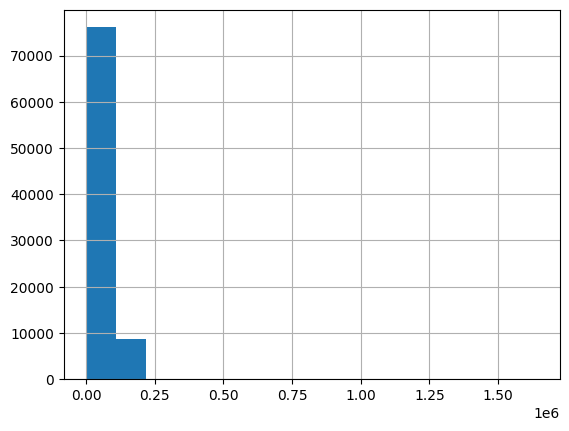

In [ ]:
#Analizamos previamente la distribucion de nuestra variable dependiente

dfar['U$ FOB Tot'].hist(bins = 15)

In [ ]:
#Analizamos las variables que puedan afectar nuestro analisis (blancos)

dfar.select_dtypes(exclude = 'object').isnull().sum()

Partida Aduanera                   0
Fecha                              0
AÑO                                0
Cod. Tributario                    0
Kg Bruto                           0
Kg Neto                            0
Toneladas                          0
Qty 1                              0
Qty 2                              0
U$ FOB Tot                         0
Precio de exportación (USD FOB)    0
U$ FOB Und 2                       0
PBI USA                            0
IBP                                0
dtype: int64

In [ ]:
#Seleccion de variables

tcols = list(dfar.columns)
ckick = dfar.select_dtypes(include = 'object').columns.tolist() + ['AÑO','Partida Aduanera', 'Cod. Tributario', 'Qty 1', 'Qty 2', 'Kg Bruto', 'Toneladas']

features = set(tcols) - set(ckick)
list(features)

['PBI USA',
 'Kg Neto',
 'Precio de exportación (USD FOB)',
 'U$ FOB Und 2',
 'U$ FOB Tot',
 'Fecha',
 'IBP']

In [ ]:
#Dataframe con las variables a analizar

dfsample = dfar[features]
dfsample.head()

<ipython-input-128-066ceef26c01>:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dfsample = dfar[features]


,PBI USA,Kg Neto,Precio de exportación (USD FOB),U$ FOB Und 2,U$ FOB Tot,Fecha,IBP
0,1437296.0,3840.0,8500.0,17000.0,32640.0,2017-10-18,11248.220553
1,1437296.0,765.0,8873.0,13309.0,6788.0,2017-10-18,11248.220553
2,1437296.0,14688.0,16257.0,99495.0,238789.0,2017-10-18,11248.220553
3,1437296.0,9000.0,7592.0,11388.0,68331.0,2017-10-18,11248.220553
4,1437296.0,1836.0,8162.0,16652.0,14987.0,2017-10-18,11248.220553


In [ ]:
#Seleccion de muestra:

from sklearn.model_selection import train_test_split

train, test = train_test_split(dfsample,
                               train_size = 0.7,
                               random_state = 123)

print(f"Total data size: {dfsample.shape}")
print(f"Total train size: {train.shape}")
print(f"Total test size: {test.shape}")

Total data size: (84843, 7)
Total train size: (59390, 7)
Total test size: (25453, 7)


##4. DATA TREATMENT

ANALISIS BIVARIADO

<Axes: xlabel='PBI USA', ylabel='Toneladas'>

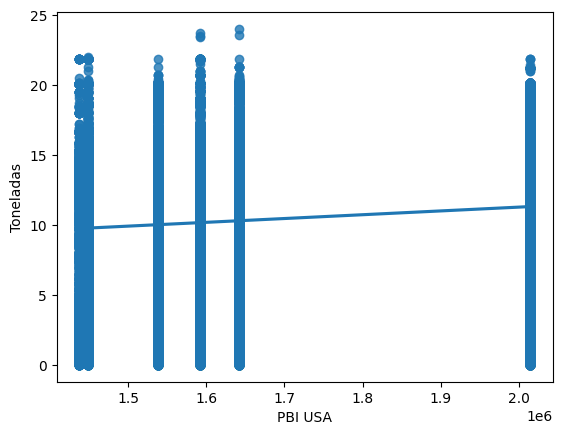

In [ ]:
sns.regplot(x = 'PBI USA', y = 'Toneladas', data=dfsample.loc[dfsample.Toneladas < 40])

In [ ]:
#Matriz de correlacion

corr_matrix = train.corr()
corr_matrix.reset_index( inplace = True )
corr_matrix.rename(columns = {'index': 'feature', 'Kg Neto': 'correl'}, inplace = True)
corr_matrix = corr_matrix[['feature', 'correl']]

corr_matrix

<ipython-input-160-84d7f4fda2cc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


,feature,correl
0,PBI USA,0.107297
1,Kg Neto,1.000000
2,Precio de exportación (USD FOB),-0.022115
3,U$ FOB Und 2,0.011735
4,U$ FOB Tot,0.772801
5,IBP,0.182643


<Axes: xlabel='U$ FOB Tot', ylabel='Kg Neto'>

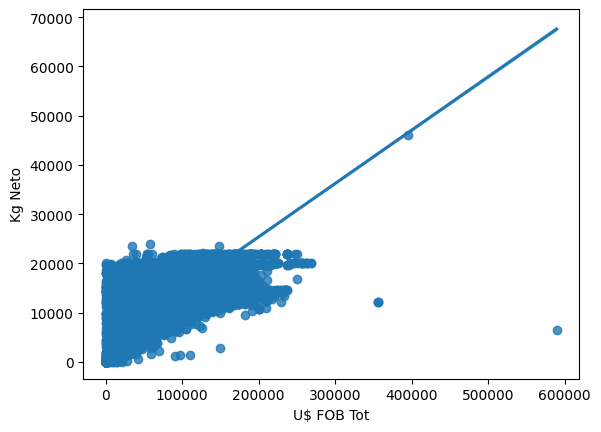

In [ ]:
sns.regplot(x = 'U$ FOB Tot', y = 'Kg Neto', data = train)

In [ ]:
#Tratamiento univariado

univ = train.describe().transpose()
univ.reset_index(inplace = True)
univ.head()

univ.rename(columns = {'index':'feature',
                             '25%': 'Q1',
                             '50%': 'median',
                             '75%': 'Q3'}, inplace = True)

univ[['missing_rate']] = 1 - univ[['count']]/train.shape[0]
univ

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate
0,PBI USA,59390.0,1.695151e+06,216216.376885,1.437296e+06,1.537777e+06,1.641639e+06,2.015092e+06,2.015092e+06,0.0
1,Kg Neto,59390.0,1.044274e+04,5494.769533,1.300000e-01,6.043935e+03,1.170000e+04,1.468800e+04,4.602240e+04,0.0
2,Precio de exportación (USD FOB),59390.0,6.229491e+03,26699.476365,0.000000e+00,4.654000e+03,5.800000e+03,7.075000e+03,4.666222e+06,0.0
3,U$ FOB Und 2,59390.0,1.829724e+04,70502.280828,0.000000e+00,1.017100e+04,1.527700e+04,2.237200e+04,1.457407e+07,0.0
4,U$ FOB Tot,59390.0,6.183122e+04,39214.470286,0.000000e+00,3.070650e+04,6.273800e+04,8.624075e+04,5.893890e+05,0.0
5,IBP,59390.0,1.414535e+04,2271.618897,4.972815e+03,1.190489e+04,1.427351e+04,1.649076e+04,1.664658e+04,0.0


In [ ]:
#Hacemos un merge de la info de los coeficientes de correlacion con los resumenes

univ2 = pd.merge(univ, corr_matrix[['feature', 'correl']], on = 'feature', how = 'left')

univ2['correl_abs'] = univ2.correl.apply(lambda x: abs(x))
univ2.sort_values(by = 'correl_abs', ascending = False, inplace = True)
univ2

,feature,count,mean,std,min,Q1,median,Q3,max,missing_rate,correl,correl_abs
1,Kg Neto,59390.0,1.044274e+04,5494.769533,1.300000e-01,6.043935e+03,1.170000e+04,1.468800e+04,4.602240e+04,0.0,1.000000,1.000000
4,U$ FOB Tot,59390.0,6.183122e+04,39214.470286,0.000000e+00,3.070650e+04,6.273800e+04,8.624075e+04,5.893890e+05,0.0,0.772801,0.772801
5,IBP,59390.0,1.414535e+04,2271.618897,4.972815e+03,1.190489e+04,1.427351e+04,1.649076e+04,1.664658e+04,0.0,0.182643,0.182643
0,PBI USA,59390.0,1.695151e+06,216216.376885,1.437296e+06,1.537777e+06,1.641639e+06,2.015092e+06,2.015092e+06,0.0,0.107297,0.107297
2,Precio de exportación (USD FOB),59390.0,6.229491e+03,26699.476365,0.000000e+00,4.654000e+03,5.800000e+03,7.075000e+03,4.666222e+06,0.0,-0.022115,0.022115
3,U$ FOB Und 2,59390.0,1.829724e+04,70502.280828,0.000000e+00,1.017100e+04,1.527700e+04,2.237200e+04,1.457407e+07,0.0,0.011735,0.011735


In [ ]:
#Nos quedamos con los siguientes features
#correlacion mayor a 0.1

ffeatures = ['U$ FOB Tot','IBP','PBI USA']
ffeatures

['U$ FOB Tot', 'IBP', 'PBI USA']

ANALISIS DEL TARGET 

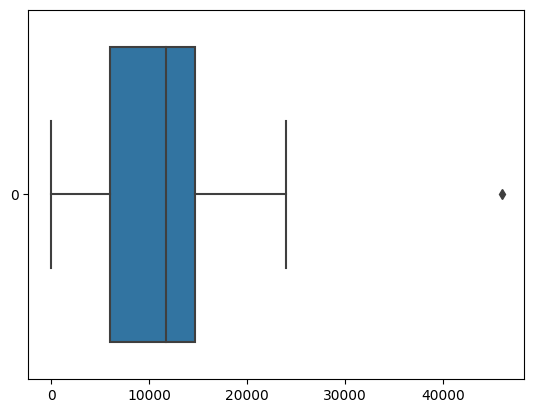

In [ ]:
#Buscamos los outliers

ax = sns.boxplot(data = dfar['Kg Neto'], orient='h')


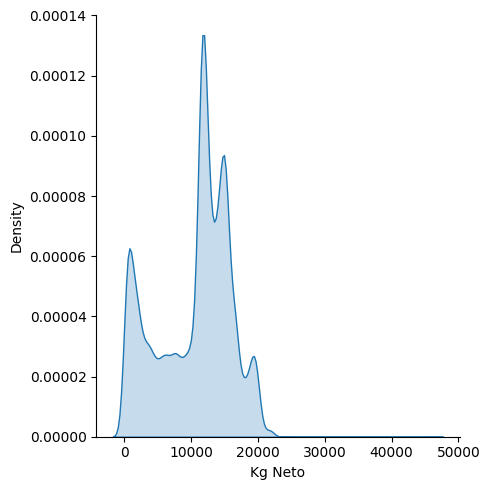

In [ ]:
sns.displot(dfar['Kg Neto'], kind = "kde", fill = True)

<h3>Outliers por Z-score</h3>

In [ ]:
#Tratamiento por zscore

upper_limit = np.mean(dfar['Kg Neto']) + 2.576*np.std(dfar['Kg Neto'])
lower_limit = np.mean(dfar['Kg Neto']) - 2.576*np.std(dfar['Kg Neto'])

dfar['Kg Neto_t'] = dfar['Kg Neto'].apply(lambda x: upper_limit if x > upper_limit
                                        else lower_limit if x < lower_limit else x)

Revisemos los resultados

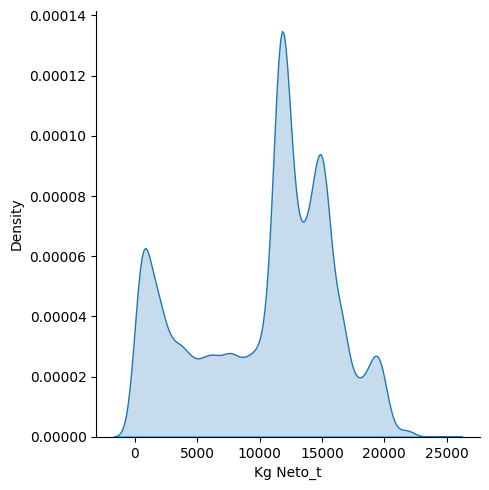

In [ ]:
#Distribucion
sns.displot(dfar['Kg Neto_t'], kind = "kde", fill = True)

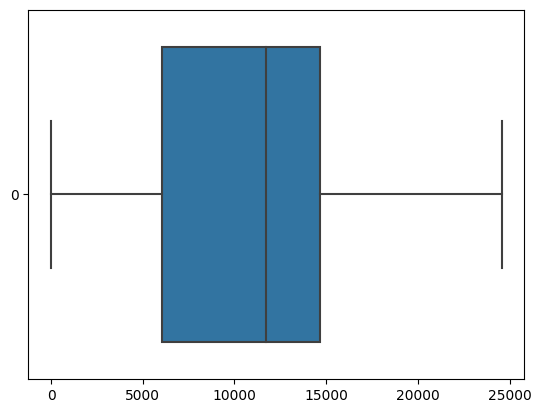

In [ ]:
#Verificamos los outliers

ax = sns.boxplot(data = dfar['Kg Neto'], orient='h')

### Tratamiento de Missings

## Modelo de regresión Lineal

## Conclusión